# WK7 Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Chris S. Belario** <br>
Course: **CPE2A**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\MATHEDA Belario\Week 7\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       3428 non-null   object 
 1   Type          3428 non-null   object 
 2   Date          3428 non-null   object 
 3   Process_Size  3422 non-null   float64
 4   TDP           3428 non-null   float64
 5   Die_Size      3428 non-null   float64
 6   Transistors   3428 non-null   float64
 7   Frequency     3428 non-null   int64  
 8   Foundry       3428 non-null   object 
 9   Vendor        3428 non-null   object 
 10  FP16          430 non-null    float64
 11  FP32          1614 non-null   float64
 12  FP64          1055 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 348.3+ KB


In [4]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/2013,22.0,95.0,160.0,1400.0,2400,Intel,Intel


# N Chips Manufactured

In [5]:
df_w = df.copy()

In [6]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1336
NVIDIA     945
Intel      807
ATI        319
Other       21
Name: count, dtype: int64

In [7]:
type(chip_count)

pandas.core.series.Series

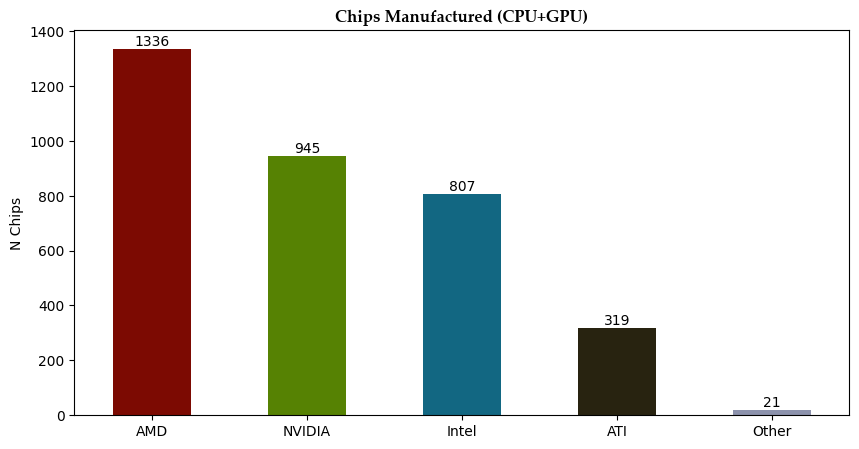

In [22]:
chart = chip_count.plot(kind='bar',
                        color = ['#7C0A02','#568203','#126782','#282310','#8C92AC'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

# N CPU Manufactured

In [9]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/2013,22.0,95.0,160.0,1400.0,2400,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...
1538,AMD EPYC 7262,CPU,8/7/2019,7.0,155.0,74.0,3800.0,3100,TSMC,AMD
1539,AMD Athlon XP 2600+ DTR,CPU,1/1/2001,130.0,68.0,101.0,63.0,1917,Unknown,AMD
1540,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.0,9800.0,3300,TSMC,AMD
1541,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.0,291.0,2333,Intel,Intel


In [10]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    787
AMD      756
Name: count, dtype: int64

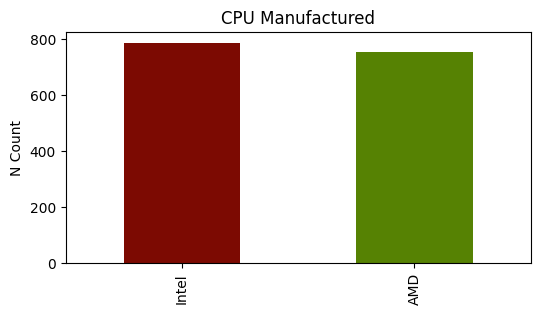

In [23]:
chart = cpu_count.plot(kind='bar',color = ['#7C0A02','#568203'] ,figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

# Lowest TDP (Thermal Design Power)

In [12]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.0
1,AMD Athlon 200GE,35.0
2,Intel Xeon E5-2603 v2,80.0
3,AMD Phenom II X4 980 BE,125.0
4,Intel Xeon E5-2470 v2,95.0
...,...,...
3423,ATI FirePro V7800,150.0
3424,NVIDIA Tegra 3 GPU,20.0
3425,NVIDIA Playstation 3 GPU 28nm,21.0
3426,NVIDIA Quadro 3000M,75.0


In [13]:
type(df_tdp)

pandas.core.frame.DataFrame

In [14]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
1098,Intel Atom Z500,1.0
44,Intel Atom Z515,1.0
337,Intel Atom Z620,1.0
1534,Intel Atom Z612,1.0
1255,Intel Atom Z610,1.0
...,...,...
3251,NVIDIA Quadro Plex 2100 S4,640.0
2856,NVIDIA Tesla S870,800.0
2528,NVIDIA Tesla S1070,800.0
2046,NVIDIA Tesla S1075,800.0


In [15]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
1098,Intel Atom Z500,1.0
44,Intel Atom Z515,1.0
337,Intel Atom Z620,1.0
1534,Intel Atom Z612,1.0
1255,Intel Atom Z610,1.0
1394,Intel Atom Z600,1.0
470,Intel Atom Z560,2.0


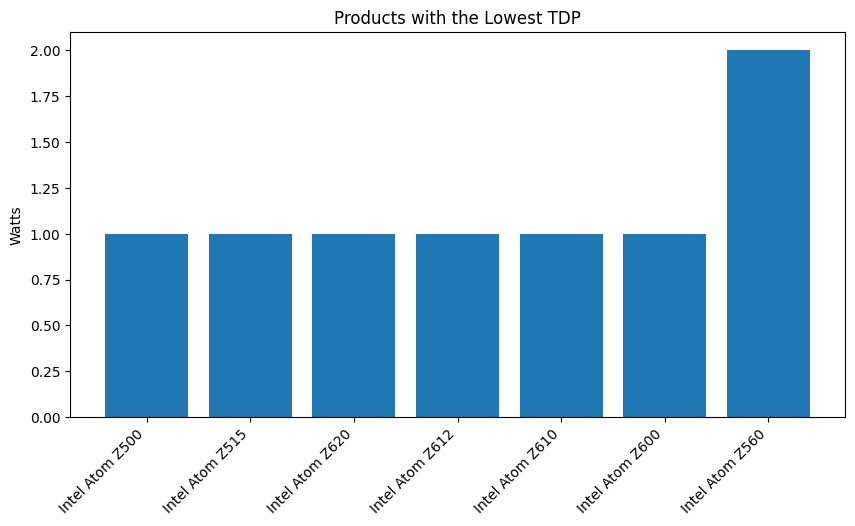

In [16]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp['TDP'])
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# GPU Process Size Trend

In [17]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
1543,GPU,4/3/2011,32.0
1544,GPU,2/23/2019,14.0
1545,GPU,9/30/2008,55.0
1546,GPU,9/1/2004,110.0
1547,GPU,12/12/2007,80.0
...,...,...,...
3423,GPU,4/26/2010,40.0
3424,GPU,11/9/2011,40.0
3425,GPU,6/3/2013,28.0
3426,GPU,2/22/2011,40.0


In [18]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
1543,GPU,2011-04-03,32.0,2011.0
1544,GPU,2019-02-23,14.0,2019.0
1545,GPU,2008-09-30,55.0,2008.0
1546,GPU,2004-09-01,110.0,2004.0
1547,GPU,2007-12-12,80.0,2007.0
...,...,...,...,...
3423,GPU,2010-04-26,40.0,2010.0
3424,GPU,2011-11-09,40.0,2011.0
3425,GPU,2013-06-03,28.0,2013.0
3426,GPU,2011-02-22,40.0,2011.0


In [19]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,205.000000
1,2001.0,165.000000
2,2002.0,150.000000
3,2003.0,142.307692
4,2004.0,128.823529
5,2005.0,112.500000
6,2006.0,93.766234
7,2007.0,77.568807
8,2008.0,62.315436
9,2009.0,52.413793


Text(0, 0.5, 'nm')

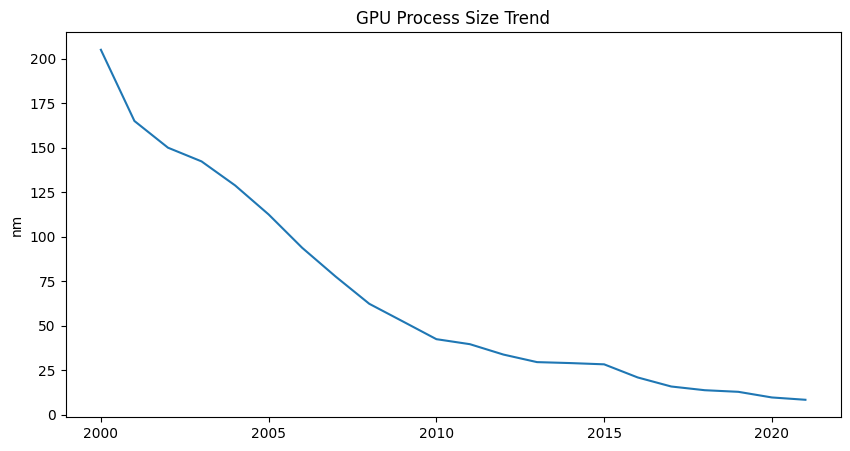

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Process_Size'])
plt.title('GPU Process Size Trend')
plt.ylabel('nm')

# GPU Die Size Trend

In [24]:
df_ps = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Die_Size
1543,GPU,4/3/2011,216.0
1544,GPU,2/23/2019,132.0
1545,GPU,9/30/2008,73.0
1546,GPU,9/1/2004,156.0
1547,GPU,12/12/2007,420.0
...,...,...,...
3423,GPU,4/26/2010,334.0
3424,GPU,11/9/2011,80.0
3425,GPU,6/3/2013,68.0
3426,GPU,2/22/2011,332.0


In [25]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Die_Size,Year
1543,GPU,2011-04-03,216.0,2011.0
1544,GPU,2019-02-23,132.0,2019.0
1545,GPU,2008-09-30,73.0,2008.0
1546,GPU,2004-09-01,156.0,2004.0
1547,GPU,2007-12-12,420.0,2007.0
...,...,...,...,...
3423,GPU,2010-04-26,334.0,2010.0
3424,GPU,2011-11-09,80.0,2011.0
3425,GPU,2013-06-03,68.0,2013.0
3426,GPU,2011-02-22,332.0,2011.0


In [26]:
df_ps = df_ps.groupby('Year')['Die_Size'].mean().reset_index()
df_ps

,Year,Die_Size
0,2000.0,118.071429
1,2001.0,90.285714
2,2002.0,142.375000
3,2003.0,135.000000
4,2004.0,192.705882
5,2005.0,241.031250
6,2006.0,197.805195
7,2007.0,194.192661
8,2008.0,208.825503
9,2009.0,183.640449


Text(0, 0.5, 'nm')

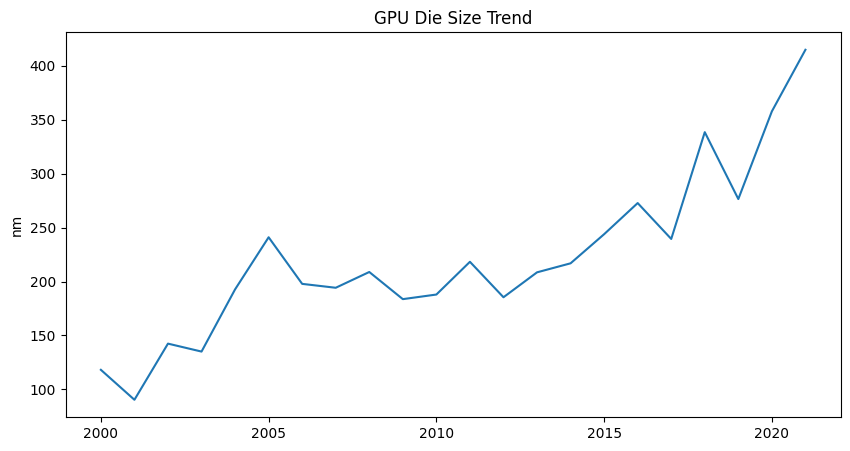

In [27]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Die_Size'])
plt.title('GPU Die Size Trend')
plt.ylabel('nm')

# GPU Transistors Trend

In [28]:
df_ps = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Transistors
1543,GPU,4/3/2011,1160.0
1544,GPU,2/23/2019,3300.0
1545,GPU,9/30/2008,242.0
1546,GPU,9/1/2004,120.0
1547,GPU,12/12/2007,720.0
...,...,...,...
3423,GPU,4/26/2010,2154.0
3424,GPU,11/9/2011,10.0
3425,GPU,6/3/2013,302.0
3426,GPU,2/22/2011,1950.0


In [29]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Transistors,Year
1543,GPU,2011-04-03,1160.0,2011.0
1544,GPU,2019-02-23,3300.0,2019.0
1545,GPU,2008-09-30,242.0,2008.0
1546,GPU,2004-09-01,120.0,2004.0
1547,GPU,2007-12-12,720.0,2007.0
...,...,...,...,...
3423,GPU,2010-04-26,2154.0,2010.0
3424,GPU,2011-11-09,10.0,2011.0
3425,GPU,2013-06-03,302.0,2013.0
3426,GPU,2011-02-22,1950.0,2011.0


In [30]:
df_ps = df_ps.groupby('Year')['Transistors'].mean().reset_index()
df_ps

,Year,Transistors
0,2000.0,27.214286
1,2001.0,45.285714
2,2002.0,69.750000
3,2003.0,74.615385
4,2004.0,134.941176
5,2005.0,207.562500
6,2006.0,248.389610
7,2007.0,331.238532
8,2008.0,543.731544
9,2009.0,633.539326


Text(0, 0.5, 'nm')

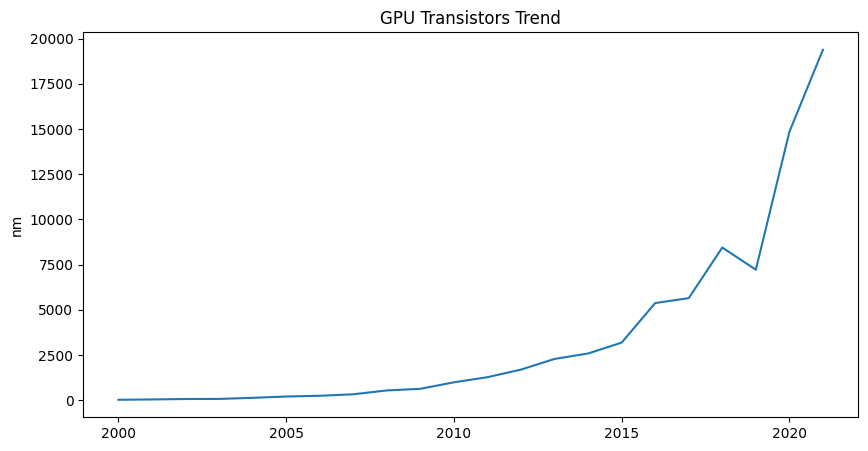

In [31]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Transistors'])
plt.title('GPU Transistors Trend')
plt.ylabel('nm')

# GPU Frequency Trend

In [32]:
df_ps = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Frequency
1543,GPU,4/3/2011,100.0
1544,GPU,2/23/2019,1469.0
1545,GPU,9/30/2008,600.0
1546,GPU,9/1/2004,400.0
1547,GPU,12/12/2007,600.0
...,...,...,...
3423,GPU,4/26/2010,700.0
3424,GPU,11/9/2011,416.0
3425,GPU,6/3/2013,550.0
3426,GPU,2/22/2011,450.0


In [33]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Frequency,Year
1543,GPU,2011-04-03,100.0,2011.0
1544,GPU,2019-02-23,1469.0,2019.0
1545,GPU,2008-09-30,600.0,2008.0
1546,GPU,2004-09-01,400.0,2004.0
1547,GPU,2007-12-12,600.0,2007.0
...,...,...,...,...
3423,GPU,2010-04-26,700.0,2010.0
3424,GPU,2011-11-09,416.0,2011.0
3425,GPU,2013-06-03,550.0,2013.0
3426,GPU,2011-02-22,450.0,2011.0


In [34]:
df_ps = df_ps.groupby('Year')['Frequency'].mean().reset_index()
df_ps

,Year,Frequency
0,2000.0,159.428571
1,2001.0,209.428571
2,2002.0,276.125000
3,2003.0,331.192308
4,2004.0,395.784314
5,2005.0,456.281250
6,2006.0,470.064935
7,2007.0,543.137615
8,2008.0,578.335570
9,2009.0,598.573034


Text(0, 0.5, 'nm')

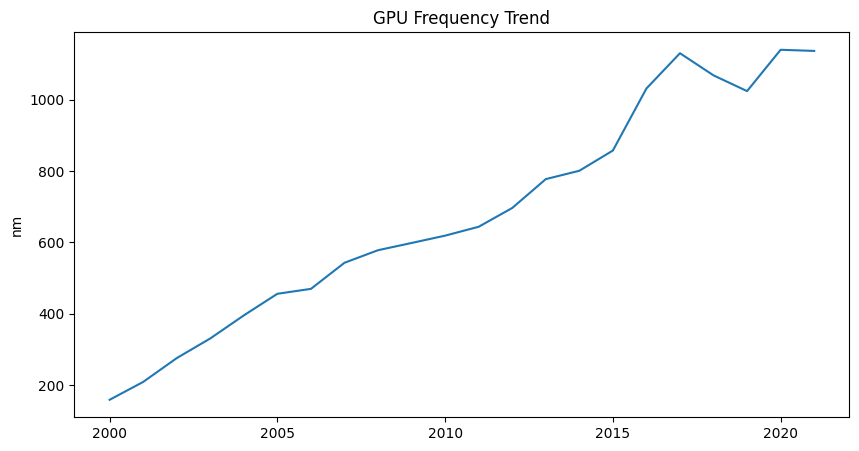

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Frequency'])
plt.title('GPU Frequency Trend')
plt.ylabel('nm')

**Note:** <br>
Trends peaked at 2020 and later